# Customer Segmentation Analysis

 Visualize the results of a customer segmentation analysis using K-Means clustering. Use a dataset of customer purchase behavior, and create scatter plots to display clusters. Include:

- Scatter plots of customers segmented into different clusters based on purchase frequency and amount.
- Distinguish clusters with different colors and markers.
- Annotate centroids of each cluster.
__Hint:__ Use `KMeans` from scikit-learn for clustering, `plt.scatter()` for `scatter plots`, and `plt.annotate()` for centroids.

__Expectation:__ A scatter plot showing distinct customer segments, each with unique colors and markers, and annotated

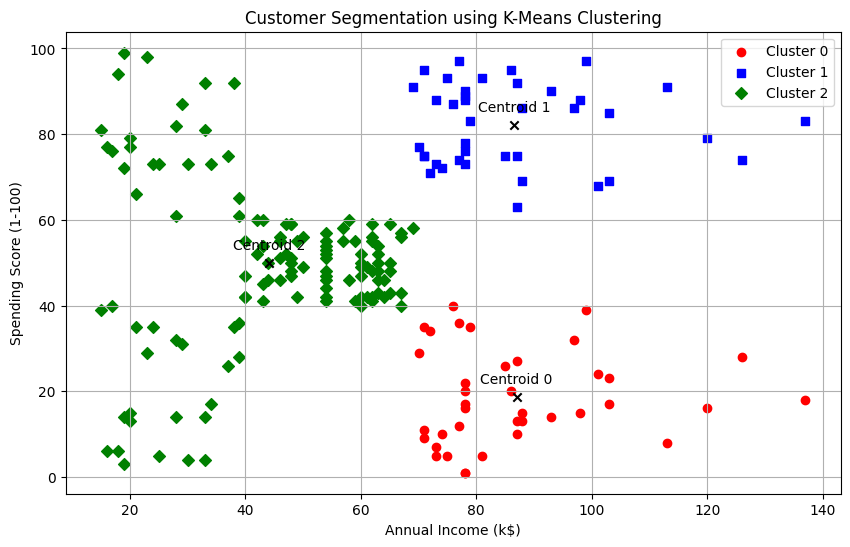

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset
file_path = 'datasets\Mall_Customers.csv'
data = pd.read_csv(file_path)

# Select the features for clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
data['cluster'] = kmeans.labels_

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot for each cluster
colors = ['red', 'blue', 'green']
markers = ['o', 's', 'D']
for i in range(3):
    cluster_data = data[data['cluster'] == i]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], 
                color=colors[i], marker=markers[i], label=f'Cluster {i}')

# Annotate centroids
centroids = kmeans.cluster_centers_
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color='black', marker='x')
    plt.annotate(f'Centroid {idx}', (centroid[0], centroid[1]), textcoords='offset points', xytext=(0,10), ha='center')

# Labels and title
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation using K-Means Clustering')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()
